In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def getMatrix(n):
    m = np.full((n, n), 0);

    startPoint = np.random.randint(n/2 - n/4, n/2 + n/4, size=2);
    m[startPoint[0], startPoint[1]] = 1;


    return (m, startPoint);


In [22]:
def getPoint(matrix, startPoint, n, r):
    count = 0;
    for i in np.arange(startPoint[0] - r, startPoint[0] + r, 1, dtype=int):
        for j in np.arange(startPoint[1] - r, startPoint[1] + r, 1, dtype=int):
            
            
            if i < 0 or i >= n or j < 0 or j >= n:
                continue;

            if matrix[i, j] == 0:
                continue;
                
            point = np.array([i, j]);
            lenght = np.linalg.norm(point-startPoint);
            if lenght < r:
                count += 1;

    return count;

In [23]:
def getFilling(matrix, n):
    count = 0;
    for i in range(n):
        for j in range(n):
            if matrix[i, j] == 1:
                count += 1;

    return count;



In [24]:
n = 156;
matrix = 0;
startPoint = 0;
directions = np.array([[1,0],[-1,0],[0,1],[0,-1]]);

def main():
    global matrix, startPoint;
    #np.random.seed(1337);

    matrix, startPoint = getMatrix(n);
    neighbors = [];
    for direction in directions: neighbors.append(startPoint + direction);

    while True:
        index = np.random.randint(0, len(neighbors));
        cell = neighbors.pop(index);
        matrix[cell[0], cell[1]] = 1;
        for direction in directions: 
            newNeighbor = cell + direction;

            if newNeighbor[0] < 0 or newNeighbor[0] >= n or newNeighbor[1] < 0 or newNeighbor[1] >= n:
                return;

            if matrix[newNeighbor[0], newNeighbor[1]] != 1:
                neighbors.append(newNeighbor);        

    return;

main();

In [25]:
rArray = [];
MArray = [];

def getMr():
    global rArray, MArray;
    rArray = np.arange(2, n / 2, 1);
    for r in rArray:
        MArray.append(getPoint(matrix, startPoint, n, r));

    rArray = np.array(rArray);
    MArray = np.array(MArray);

    return;

getMr();

LnM / ln r = 2.351032140233913, filling = 12361




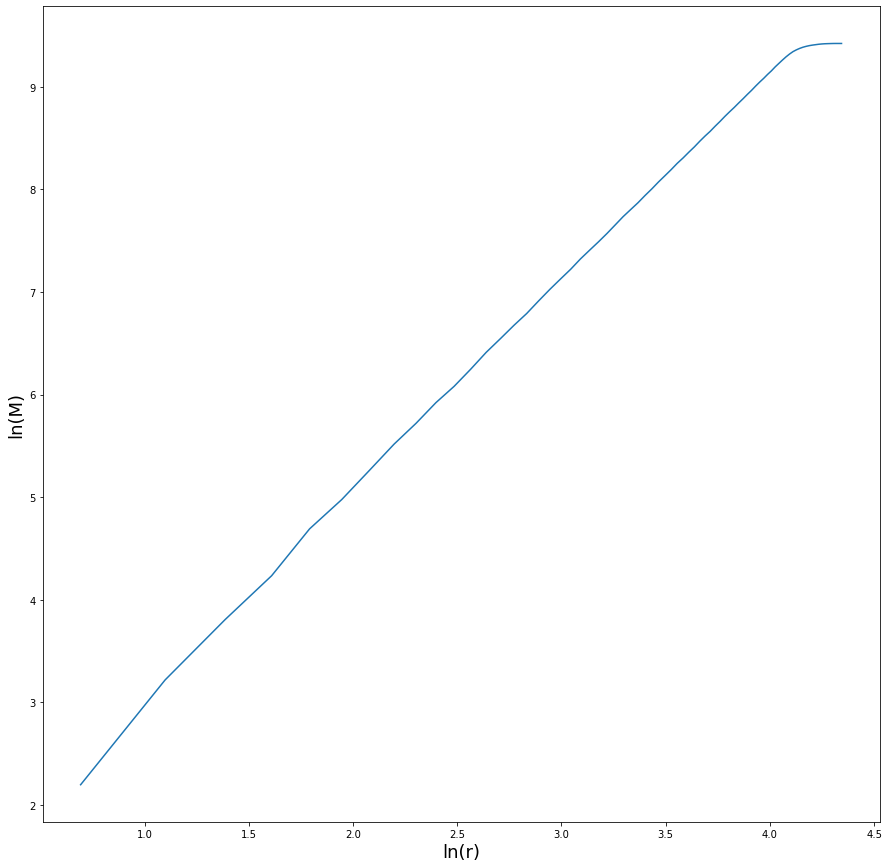

In [26]:
print("LnM / ln r = {}, filling = {}\n\n".format(np.mean(np.log(MArray) / np.log(rArray)), getFilling(matrix, n)));
fig, ax = plt.subplots();
fig.set_figwidth(15);
fig.set_figheight(15);
ax.set_xlabel("ln(r)", fontsize=18);    
ax.set_ylabel("ln(M)", fontsize=18);
ax.plot(np.log(rArray), np.log(MArray));
plt.show();


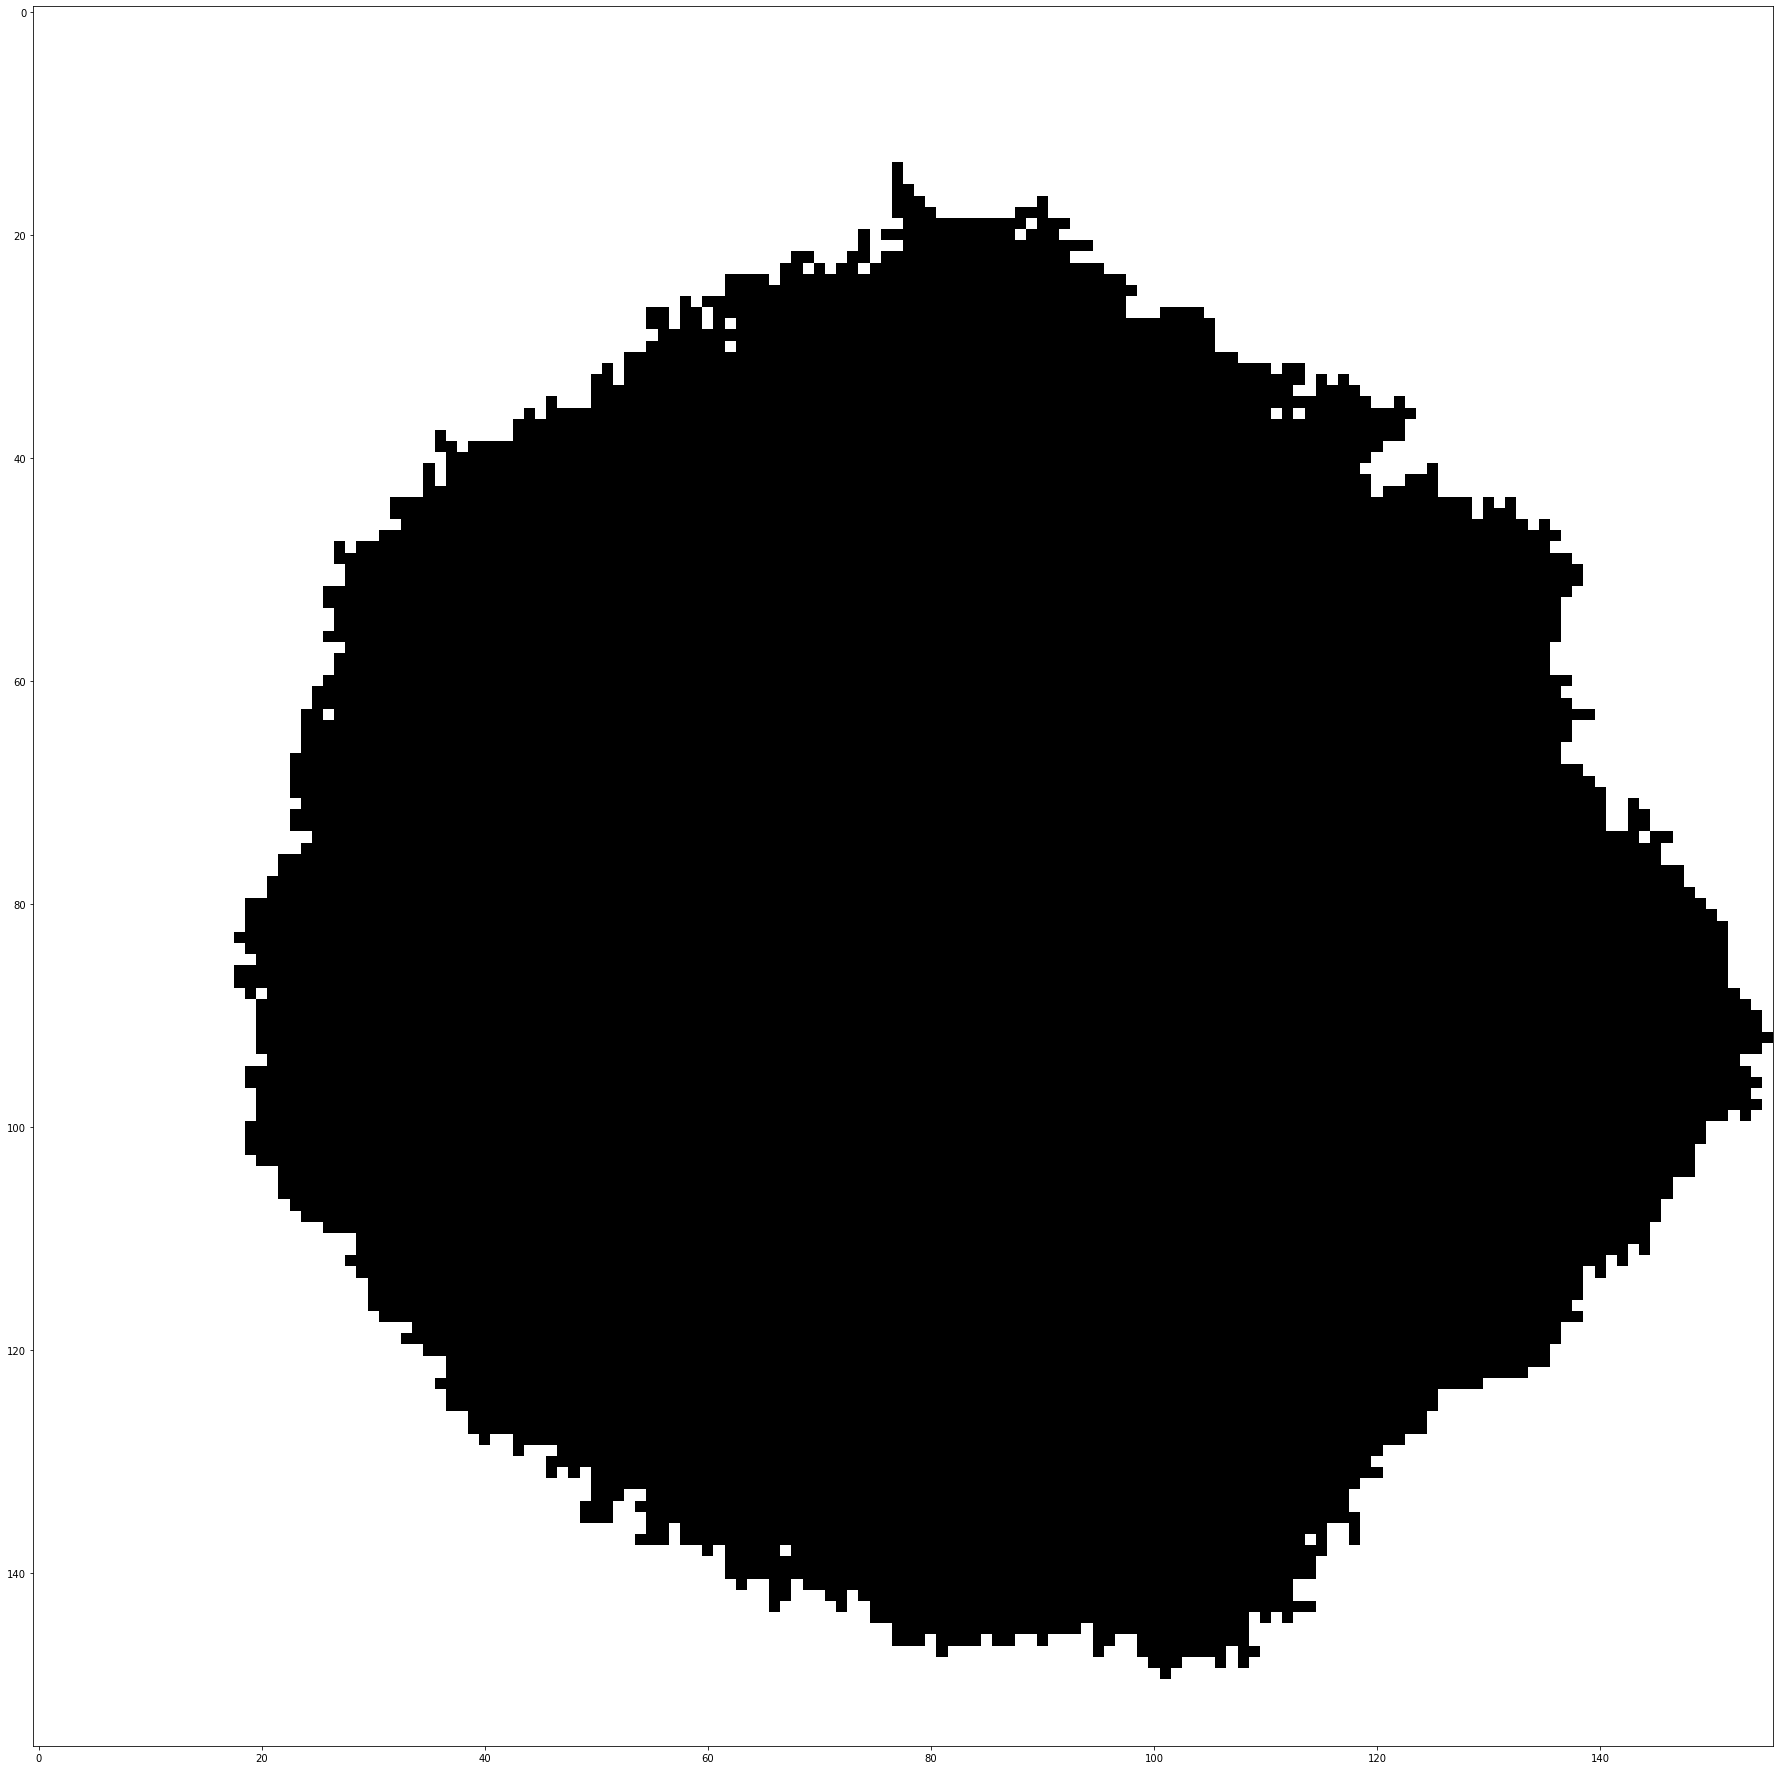

In [27]:
imageData = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        imageData[i, j] = matrix[i, j];

plt.figure(figsize=(32,32));
plt.imshow(imageData, cmap='Greys')
plt.show()

In [28]:
import xlwt

file = xlwt.Workbook(encoding="utf-8");
matrixSheet = file.add_sheet("Matrix");

for i in range(n):
        for j in range(n):
            matrixSheet.write(i, j, int(matrix[i, j]));

two = file.add_sheet("two");

two.write(0, 2, "Filling");
two.write(0, 3, getFilling(matrix, n));
two.write(1, 2, "LnM / lnr");
two.write(1, 3, np.mean(np.log(MArray) / np.log(rArray)));

two.write(0, 0, "lnr");
two.write(0, 1, "lnM");

for i in range(rArray.size):
    two.write(i + 1, 0, int(rArray[i]));
    two.write(i + 1, 1, int(MArray[i]));

file.save("GenFiles/9/1.xls");